In [96]:
from coord import *
import matplotlib.pyplot as plt
import numpy as np
from genreflex import get_v, plot_reflex_model, make_apex_data, table2_results, make_bulk_motion_data
import matplotlib as mpl
import matplotlib.cm as cm


# This notebook shows how to compute the reflex motion model velocities for a given input of data.
# The reflex motion model consists of the dipole componenet and bulk motions. You can restrict the model to be only the dipole by setting the bulk motions to zero in the cell below

In [31]:
# Results from table 1 in YPP+2024
lrr = np.array([119.8, 139.1, 63.5, 37.8])
brr = np.array([19.5, -59.4, -46.4, -37.3])
vtrr= np.array([15.7, 16.6, 23.2, 40.4])
vrrr= np.array([7.9, -10.1, -27, -8.5])
vphirr=np.array([-11.5,-13.5,-20.,-23.])
vthrr =np.array([-8., 8., 19,17.3])

#uncomment for only dipole 
# vrrr = np.zeros_like(vrrr)
# vphirr = np.zeros_like(vphirr)
# vthrr = np.zeros_like(vthrr)

vsun_mw = np.array([11.1, 244.24, 7.25])  # km/s
rsun_mw = np.array([-8.3, 0., 0.02])  # kpc


## Calculating reflex Example with the K-Giant catalog used in YPP+24

In [27]:
#load in my data
dat = np.loadtxt("processed_real/binned_sgr_4bin/KG/KGiant_edr3_metal_sgr_20.txt")
bindata = np.loadtxt("processed_real/binned_sgr_4bin/KG/KGiant_edr3_metal_sgr_20_bin_edges.txt")
rgal = dat[:,:3]
vgal = dat[:,3:6]
r3 = np.sqrt(rgal[:,0]**2 + rgal[:,1]**2 + rgal[:,2]**2)
l = dat[:,6]
b = dat[:,7]

mul, mub = dat[:, 10], dat[:, 11]
dist = dat[:, 8]
fac = 4.74057 * dist
vlos = dat[:, 9]
vl, vb = mul*fac, mub*fac




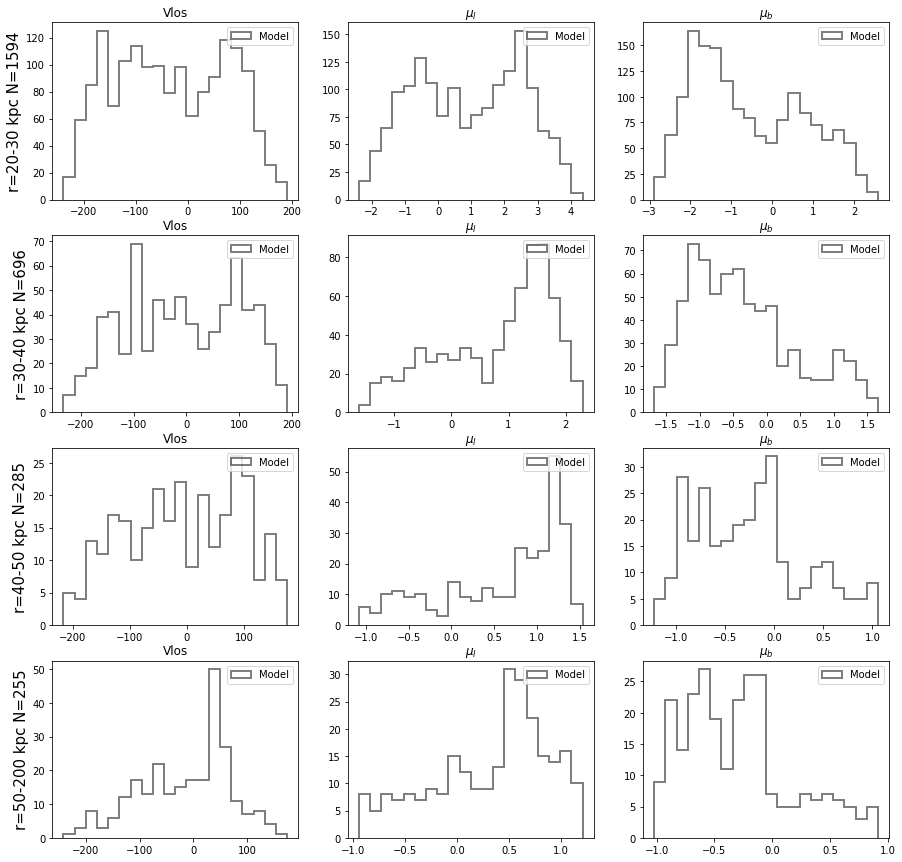

In [28]:
#create an empty array for the modelled velocities
vgalacticmodel = np.zeros((len(r3),3))
#read in the bin edeges, not you can put this in by hand
rbins = bindata[:,0]

for i in range(len(rbins)-1):
    #create the cube list from the table 2 results
    cube = [lrr[i], brr[i], vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    #mask the data to calculate the model only for stars in the correct bin
    mask = np.where((r3 > rbins[i]) & (r3 < rbins[i+1]))[0]
    rgalmask = rgal[mask]
    vgalmask = vgal[mask]
    #calculate the reflex model
    _,_,_,vlosm, vlm, vbm = get_v(cube, rgalmask, vgalmask,solar=True)
    #populate the modelled velocities
    vgalacticmodel[mask,1] = vlm /fac[mask]**2.
    vgalacticmodel[mask,2] = vbm /fac[mask]**2.
    vgalacticmodel[mask,0] = vlosm

#crate some masks for plotting
masks = []
for i in range(len(rbins)-1):
    mask = np.where((r3 > rbins[i]) & (r3 < rbins[i+1]))[0]
    masks.append(mask)

#now we have the modelled vlos and the vlos from the data, lets plot the histograms of model
fig, ax = plt.subplots(len(rbins)-1,3, figsize=(15,15))

binnum = [20,20,20,20]
for i in range(len(rbins)-1):
    # ax[i,0].hist(vlos[masks[i]], bins=20, alpha=0.5, label="Data")
    ax[i,0].hist(vgalacticmodel[masks[i],0], bins=binnum[i], alpha=0.5, label="Model",histtype='step', color="k", lw=2)
    ax[i,0].set_title("Vlos")
    ax[i,0].legend()

    ax[i,1].hist(vgalacticmodel[masks[i],1], bins=binnum[i], alpha=0.5, label="Model",histtype='step', color="k", lw=2)
    ax[i,1].set_title(r"$\mu_l$")
    ax[i,1].legend()

    ax[i,2].hist(vgalacticmodel[masks[i],2], bins=binnum[i], alpha=0.5, label="Model",histtype='step', color="k", lw=2)
    ax[i,2].set_title(r"$\mu_b$")
    ax[i,2].legend()

for i in range(len(rbins)-1):
    ax[i,0].set_ylabel("r="+str(int(rbins[i]))+"-"+str(int(rbins[i+1]))+" kpc" + " N=" + str(len(vlos[masks[i]])), fontsize=15)


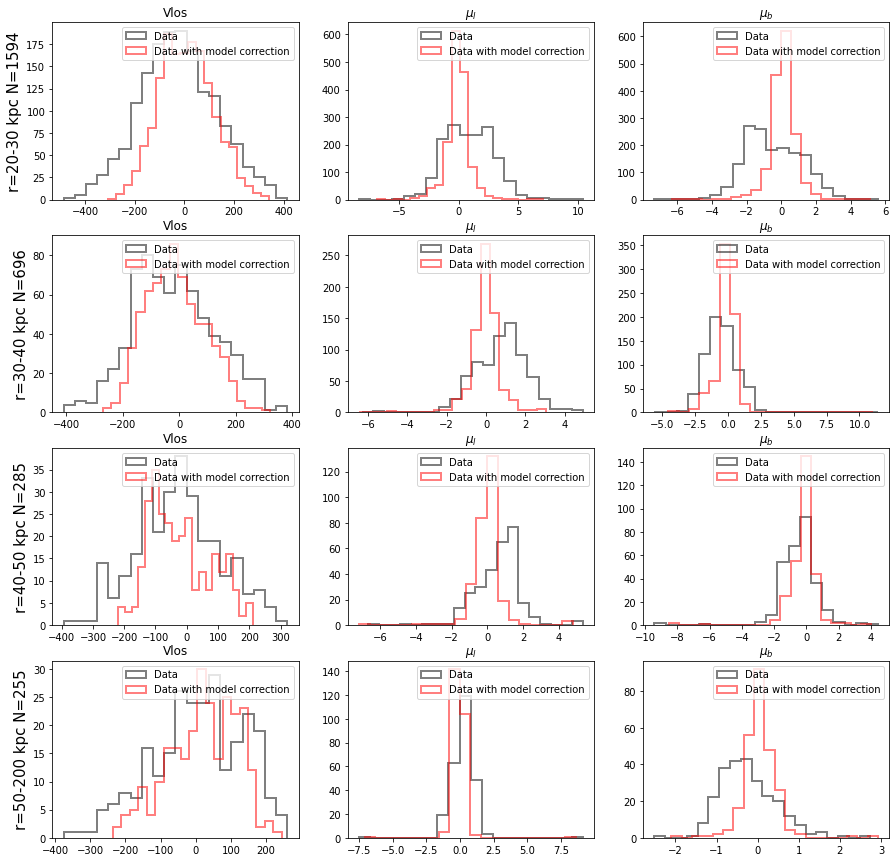

In [29]:
#now plot the vlos,mul,mub distributions before and after corrections in each bin

fig, ax = plt.subplots(len(rbins)-1,3, figsize=(15,15))

for i in range(len(rbins)-1):
    ax[i,0].hist(vlos[masks[i]], bins=binnum[i], alpha=0.5, label="Data",histtype='step', color="k", lw=2)
    ax[i,0].hist(vlos[masks[i]] - vgalacticmodel[masks[i],0], bins=binnum[i], alpha=0.5, label="Data with model correction",histtype='step', color="r", lw=2)
    ax[i,0].set_title("Vlos")
    ax[i,0].legend()

    ax[i,1].hist(mul[masks[i]], bins=binnum[i], alpha=0.5, label="Data",histtype='step', color="k", lw=2)
    ax[i,1].hist(mul[masks[i]] - vgalacticmodel[masks[i],1], bins=binnum[i], alpha=0.5, label="Data with model correction",histtype='step', color="r", lw=2)
    ax[i,1].set_title(r"$\mu_l$")
    ax[i,1].legend()

    ax[i,2].hist(mub[masks[i]], bins=binnum[i], alpha=0.5, label="Data",histtype='step', color="k", lw=2)
    ax[i,2].hist(mub[masks[i]] - vgalacticmodel[masks[i],2], bins=binnum[i], alpha=0.5, label="Data with model correction",histtype='step', color="r", lw=2)
    ax[i,2].set_title(r"$\mu_b$")
    ax[i,2].legend()

for i in range(len(rbins)-1):
    ax[i,0].set_ylabel("r="+str(int(rbins[i]))+"-"+str(int(rbins[i+1]))+" kpc" + " N=" + str(len(vlos[masks[i]])), fontsize=15)

    

## Now lets make the final dictionary containing the corrections for each bin

# Important format of the input data

The input data must have shape Nrows*Ncols, where each row is data for each star.

The columns **must** be in this order:

- Columns 1-6: x, y, z, vx, vy, vz (galactocentric cartesian positions and velocities) 
- Columns 7-12: l, b, distance (heliocentric), line-of-sight velocity, mu_l, mu_b
- Columns 13-17: distance_error, vlos_error, mul_error, mub_error, proper motion correlation

The units for the input file are as follows:
- Positions: kpc
- Velocities: km/s
- Distances: kpc
- Angles: deg
- Line-of-sight velocities: km/s
- Proper motions: mas/yr
- Errors: mas/yr

any columns beyond 17 are not used by this repo (but can be used by you!)

In [30]:
#load in my data
dat = np.loadtxt("processed_real/binned_sgr_4bin/KG/KGiant_edr3_metal_sgr_20.txt")
print(dat.shape)
bindata = np.loadtxt("processed_real/binned_sgr_4bin/KG/KGiant_edr3_metal_sgr_20_bin_edges.txt")
rgal = dat[:,:3]
vgal = dat[:,3:6]
r3 = np.sqrt(rgal[:,0]**2 + rgal[:,1]**2 + rgal[:,2]**2)
l = dat[:,6]
b = dat[:,7]

mul, mub = dat[:, 10], dat[:, 11]
dist = dat[:, 8]
fac = 4.74057 * dist
vlos = dat[:, 9]
vl, vb = mul*fac, mub*fac

#create an empty array for the modelled velocities
vgalacticmodel = np.zeros((len(r3),3))
#read in the bin edeges, note you can put this in by hand
rbins = bindata[:,0]
#make a dictionary.
vcorr = dict()
#crate some mask to have the correct array dimensions when populating the numpy arrays
masks = []
for i in range(len(rbins)-1):
    mask = np.where((r3 > rbins[i]) & (r3 < rbins[i+1]))[0]
    masks.append(mask)

#make keys in vcorr for each bin
for i in range(len(rbins)-1):
    vcorr['%s-%s' % (int(rbins[i]), int(rbins[i+1]))] = np.zeros((len(masks[i]),3))
for i in range(len(rbins)-1):
    #create the cube list from the table 2 results
    cube = [lrr[i], brr[i], vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    #mask the data to calculate the model only for stars in the correct bin
    mask = np.where((r3 > rbins[i]) & (r3 < rbins[i+1]))[0]
    rgalmask = rgal[mask]
    vgalmask = vgal[mask]
    #calculate the reflex model
    _,_,_,vlosm, vlm, vbm = get_v(cube, rgalmask, vgalmask,solar=True)
    #populate the modelled velocities in the dictionary
    vcorr['%s-%s' % (int(rbins[i]), int(rbins[i+1]))][:,0] = vlosm
    vcorr['%s-%s' % (int(rbins[i]), int(rbins[i+1]))][:,1] = vlm /fac[mask]**2.
    vcorr['%s-%s' % (int(rbins[i]), int(rbins[i+1]))][:,2] = vbm /fac[mask]**2.



(2830, 23)


In [23]:
vcorr['20-30'].shape

(1594, 3)